# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Alda Fuadiyah Suryono
- **Email:** m180d4kx1497@bangkit.academy
- **ID Dicoding:** aldafuadiyahs

## Menentukan Pertanyaan Bisnis

- Berapa persentase jumlah pelanggan casual tertinggi berdasarkan weekday untuk setiap jam 7?
- Cuaca yang bagaimana dengan penyewaan rental sepeda tersedikit?

## Import Semua Packages/Library yang Digunakan

In [3]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import numpy as np

In [5]:
sns.set(style='whitegrid')

## Data Wrangling

### Gathering Data

Membuat DataFrame

In [8]:
day_df = pd.read_csv("/day.csv")
day_df.head() #untuk menampilkan data 5 baris pertama

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
hour_df = pd.read_csv("/hour.csv")
hour_df.head() #untuk menampilkan data 5 baris pertama

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Assessing DataFrame `day_df`



In [10]:
#memeriksa tipe data per kolom day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak terdapat masalah dengan tipe data dan missing value pada `day_df`

In [11]:
#memeriksa data duplikasi
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat data yang terduplikat pada `day_df`

In [12]:
#menampilkan statistika deskriptif day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Assessing DataFrame `hour_df`

In [13]:
#memeriksa tipe data per kolom hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tidak terdapat masalah dengan tipe data dan missing value pada `hour_df`

In [14]:
#memeriksa data duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat data yang terduplikat pada `hour_df`

In [15]:
#menampilkan statistika deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [16]:
#menghapus kolom tidak terpakai dalam data day_df
day_df.drop(['dteday', 'mnth', 'holiday', 'weathersit', 'temp', 'atemp', 'hum'], axis=1, inplace=True)
day_df.head()

,instant,season,yr,weekday,workingday,windspeed,casual,registered,cnt
0,1,1,0,6,0,0.160446,331,654,985
1,2,1,0,0,0,0.248539,131,670,801
2,3,1,0,1,1,0.248309,120,1229,1349
3,4,1,0,2,1,0.160296,108,1454,1562
4,5,1,0,3,1,0.186900,82,1518,1600


In [17]:
#menghapus kolom tidak terpakai dalam data hour_df
hour_df.drop(['dteday', 'mnth', 'holiday', 'weathersit', 'temp', 'atemp', 'hum'], axis=1, inplace=True)
hour_df.head()

,instant,season,yr,hr,weekday,workingday,windspeed,casual,registered,cnt
0,1,1,0,0,6,0,0.0,3,13,16
1,2,1,0,1,6,0,0.0,8,32,40
2,3,1,0,2,6,0,0.0,5,27,32
3,4,1,0,3,6,0,0.0,3,10,13
4,5,1,0,4,6,0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore day

In [18]:
#rangkuman statistika deskriptif
day_df.describe()

,instant,season,yr,weekday,workingday,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,2.997264,0.683995,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,2.004787,0.465233,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,1.000000,0.000000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,3.000000,1.000000,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,5.000000,1.000000,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,6.000000,1.000000,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
#melihat demografi pelanggan berdasarkan musim
day_df.groupby(by="season").agg({
    "windspeed": "mean",
    "cnt": ["max", "min", "mean"]
})

windspeed   cnt                   
            mean   max   min         mean
season                                   
1       0.214537  7836   431  2604.132597
2       0.203507  8362   795  4992.331522
3       0.172095  8714  1115  5644.303191
4       0.171995  8555    22  4728.162921

### Explore hour



In [20]:
#rangkuman statistika deskriptif
hour_df.describe()

,instant,season,yr,hr,weekday,workingday,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,11.546752,3.003683,0.682721,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,6.914405,2.005771,0.465431,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,6.000000,1.000000,0.000000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,12.000000,3.000000,1.000000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,18.000000,5.000000,1.000000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,23.000000,6.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [21]:
#menampilkan jumlah pelanggan casual dari pukul 15 hingga 18
#Filter data untuk jam 15 hingga 18
hour_df_filtered = hour_df[(hour_df['hr'] >= 15) & (hour_df['hr'] <= 18)]

#Mengelompokkan berdasarkan jam dan menghitung jumlah pelanggan casual
hour_df_filtered.groupby(by="hr").agg({"casual": "sum"})

,casual
hr,
15,54606
16,53834
17,54220
18,44496


In [22]:
#menggabungkan day dan hour
day_hour_df = pd.merge(
   left=day_df,
   right=hour_df,
   how="left",
   left_on="instant",
   right_on="instant"
)
day_hour_df.head()

,instant,season_x,yr_x,weekday_x,workingday_x,windspeed_x,casual_x,registered_x,cnt_x,season_y,yr_y,hr,weekday_y,workingday_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,1,0,6,0,0.160446,331,654,985,1,0,0,6,0,0.0,3,13,16
1,2,1,0,0,0,0.248539,131,670,801,1,0,1,6,0,0.0,8,32,40
2,3,1,0,1,1,0.248309,120,1229,1349,1,0,2,6,0,0.0,5,27,32
3,4,1,0,2,1,0.160296,108,1454,1562,1,0,3,6,0,0.0,3,10,13
4,5,1,0,3,1,0.186900,82,1518,1600,1,0,4,6,0,0.0,0,1,1


In [23]:
day_hour_df.to_csv("all_data_bike_sharing.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [26]:
#Berapa persentase jumlah pelanggan casual tertinggi berdasarkan weekday untuk setiap jam 7?
#Filter data untuk jam 7
day_hour_df_7 = day_hour_df[day_hour_df['hr'] == 7]
#Mengelompokkan berdasarkan weekday dan menghitung rata-rata persentase
result = day_hour_df_7.groupby(by="weekday_y").agg({"casual_y": "mean"})
print(result)

           casual_y
weekday_y          
0          0.400000
1          2.600000
2          2.250000
3          0.800000
4          0.333333
5          3.000000
6          0.800000


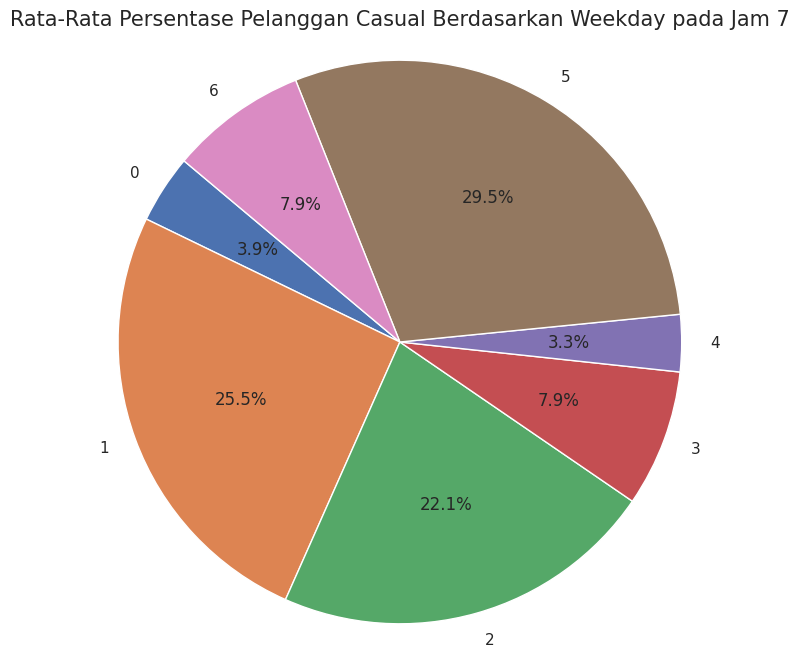

In [27]:
#membuat pie chart untuk jumlah pelanggan per hari jam 7
#Filter data untuk jam 7
day_hour_df_7 = day_hour_df[day_hour_df['hr'] == 7]
#Mengelompokkan berdasarkan weekday dan menghitung rata-rata persentase
result = day_hour_df_7.groupby(by="weekday_y").agg({"casual_y": "mean"})
#Membuat diagram pie chart
plt.figure(figsize=(8, 8))
plt.pie(result['casual_y'], labels=result.index, autopct='%1.1f%%', startangle=140)
plt.title('Rata-Rata Persentase Pelanggan Casual Berdasarkan Weekday pada Jam 7', fontsize=15)
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

### Pertanyaan 2:

In [28]:
#Cuaca yang bagaimana dengan penyewaan rental sepeda tersedikit?
day_hour_df.groupby(by="season_x").agg({"cnt_x": "sum"})

,cnt_x
season_x,
1,471348
2,918589
3,1061129
4,841613


<ipython-input-29-7aba9f9fac5d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season_x", y="cnt_x", data=day_hour_df, palette=colors, ax=ax)
<ipython-input-29-7aba9f9fac5d>:8: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="season_x", y="cnt_x", data=day_hour_df, palette=colors, ax=ax)


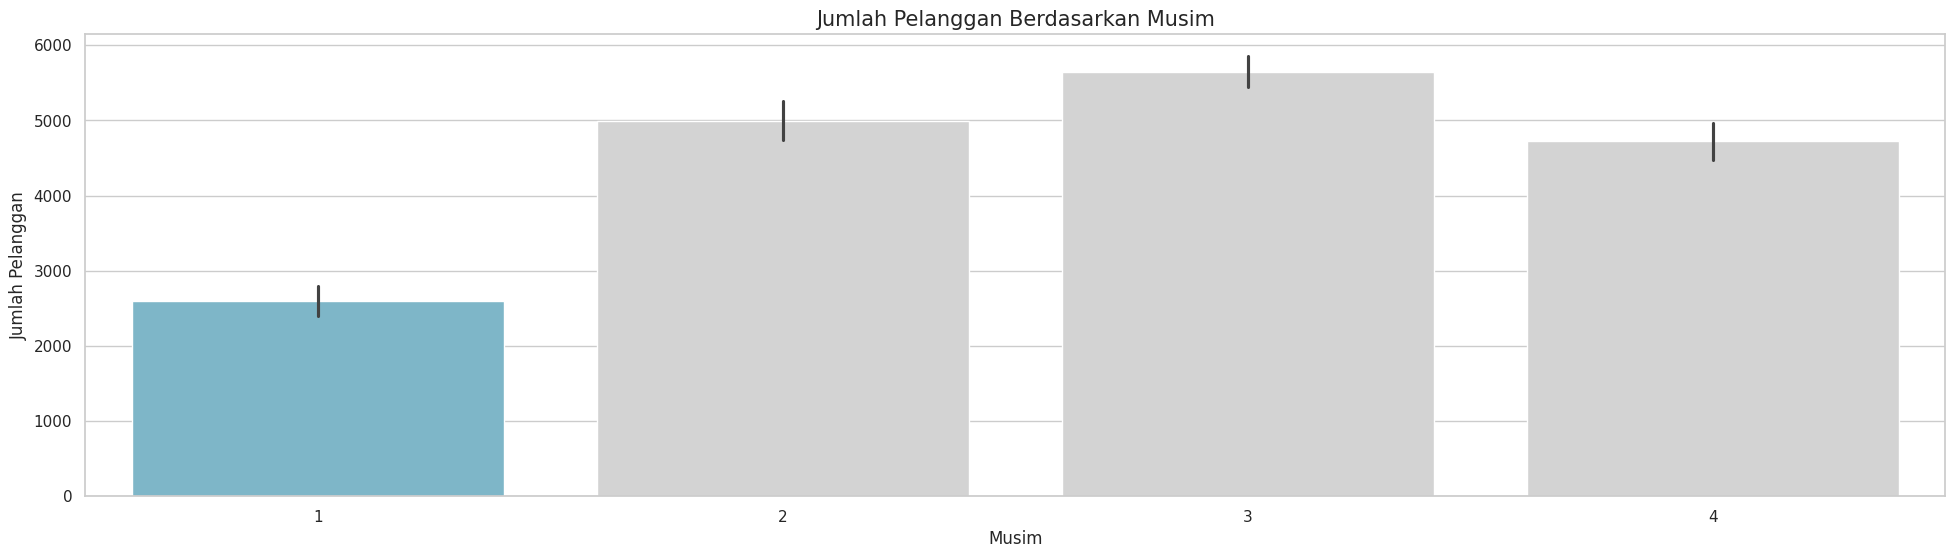

In [29]:
# Membuat kanvas
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

# Daftar warna untuk setiap bar (sesuai dengan jumlah musim)
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Membuat diagram batang dengan seaborn
sns.barplot(x="season_x", y="cnt_x", data=day_hour_df, palette=colors, ax=ax)

# Mengatur label dan judul
ax.set_ylabel("Jumlah Pelanggan", fontsize=12)
ax.set_xlabel("Musim", fontsize=12)
ax.set_title("Jumlah Pelanggan Berdasarkan Musim", loc="center", fontsize=15)

# Menyembunyikan legend
ax.legend().remove()

# Menampilkan diagram
plt.show()

## Conclusion

- Dapat diketahui bahwa persentase jumlah pelanggan tertinggi berdasarkan weekday pada setiap jam 7 adalah di hari ke-5 dengan angka 29,5%
- Dapat diketahui bahwa jumlah pelanggan terdikit ada pada season ke-1 atau season springer